## TD control
This notebook provides examples of different temporal difference-based approaches to control.

### Setup
Load the required modules as well as some other standard ones that might be needed.

In [132]:
# Setup environment and import standard modules
import sys
import os
import datetime
import numpy as np
import pandas as pd

# Import numerical libraries (skip these for now)
#import sklearn as skl
#from sklearn import linear_model, metrics
#import tensorflow as tf
#from tensorflow import keras
#print('Tensorflow version: {}'.format(tf.__version__))

# Set up plotting (inline)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import custom modules
#sys.path.append(os.path.join(os.getcwd(), 'modules'))
#import plottools as pt

# Import OpenAI Gym
import gym
print('Open AI Gym version: {}'.format(gym.__version__))

# Autoreload (see https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html)
%load_ext autoreload
%autoreload 2

Open AI Gym version: 0.15.4
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### On-policy TD control (Sarsa)

In [159]:
import Discrete

episodes = 100000
block_size = int(episodes/20)
eps = 0.5
is_slippery = False

# Create environment and initialize agent
env = gym.make('FrozenLake-v0', is_slippery=is_slippery)
Agent = Discrete.OnPolicyTDControl(env)
steps, rewards = Agent.run(episodes, block_size=block_size, eps=eps)
env.close()

Episode 5000 finished: reward rate = 0.3048
Episode 10000 finished: reward rate = 0.3996
Episode 15000 finished: reward rate = 0.4038
Episode 20000 finished: reward rate = 0.404
Episode 25000 finished: reward rate = 0.4102
Episode 30000 finished: reward rate = 0.4004
Episode 35000 finished: reward rate = 0.3872
Episode 40000 finished: reward rate = 0.4028
Episode 45000 finished: reward rate = 0.391
Episode 50000 finished: reward rate = 0.3946
Episode 55000 finished: reward rate = 0.415
Episode 60000 finished: reward rate = 0.411
Episode 65000 finished: reward rate = 0.4066
Episode 70000 finished: reward rate = 0.3956
Episode 75000 finished: reward rate = 0.4052
Episode 80000 finished: reward rate = 0.404
Episode 85000 finished: reward rate = 0.4122
Episode 90000 finished: reward rate = 0.4004
Episode 95000 finished: reward rate = 0.3952
Episode 100000 finished: reward rate = 0.4102


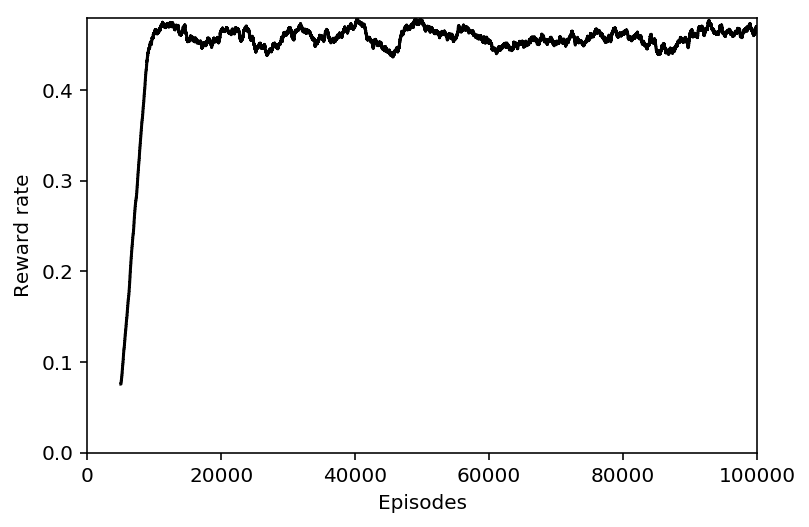

array([[0.16426529, 0.12195301, 0.12235333, 0.12233878],
       [0.07444469, 0.08343221, 0.08180877, 0.11371498],
       [0.11091212, 0.09524942, 0.10434697, 0.08662087],
       [0.06571519, 0.06445309, 0.06516584, 0.08155548],
       [0.20006075, 0.09261236, 0.12035494, 0.10124982],
       [0.        , 0.        , 0.        , 0.        ],
       [0.10812747, 0.05897639, 0.14569126, 0.0602927 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.11450138, 0.19228954, 0.11792514, 0.28776495],
       [0.15604077, 0.46026169, 0.24759161, 0.15165943],
       [0.5171681 , 0.21413357, 0.21884751, 0.14145654],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.3129726 , 0.32171442, 0.57876888, 0.2991372 ],
       [0.45884918, 0.78821569, 0.48711318, 0.54906099],
       [0.        , 0.        , 0.        , 0.        ]])

In [158]:
# Plot results

# Calculate reward rate as the running average over a the number of trials specified by update_block
reward_rate = np.convolve(rewards, np.ones(block_size), mode='valid') / block_size
episode_number = np.arange(block_size, episodes+1)

# Plot reward rate vs episodes
plt.plot(episode_number, reward_rate, color='k')
plt.ylabel('Reward rate')
plt.xlabel('Episodes')
plt.xlim(0, episodes)
plt.ylim(0, np.max(reward_rate))
plt.show()

Agent.Q

A few observations:
- This environment is a bit tricky to use.  Rewards are very scarce, which means that learning is difficulty unless there is a lot of exploration.
- Having a high epsilon is probably good for a while in order to encourage exploration. Once a sufficient number of rewards have been encountered, it might make sense to start to taper this towards 0.
- Turning off randomness in the environment makes it very difficult to find a reward with a small epsilon
- The maximum reward rate when the randomness is turned off tends to plateau at a little less than $1-\epsilon$. When environmental randomness is on, the final reward rate is ~0.45 for $\epsilon = 0.05$.

In [173]:
# Test classes
TDBase_Agent = Discrete.TDControl(env)
Sarsa_Agent = Discrete.Sarsa(env)
Q_Agent = Discrete.QLearning(env)

TDBase_Agent.info()
Sarsa_Agent.info()
Q_Agent.info()

Class: TDControl (base class)
Class: Sarsa
Class: Q-learning


In [177]:
# Run Sarsa

episodes = 1000
block_size = int(episodes/20)
eps = 0.5
is_slippery = False

# Create environment and initialize agent
env = gym.make('FrozenLake-v0', is_slippery=is_slippery)
Agent = Discrete.Sarsa(env)
steps, rewards = Agent.run(episodes, block_size=block_size, eps=eps)
env.close()

Episode 50 finished: reward rate = 0.0
Episode 100 finished: reward rate = 0.0
Episode 150 finished: reward rate = 0.0
Episode 200 finished: reward rate = 0.0
Episode 250 finished: reward rate = 0.0
Episode 300 finished: reward rate = 0.0
Episode 350 finished: reward rate = 0.0
Episode 400 finished: reward rate = 0.0
Episode 450 finished: reward rate = 0.0
Episode 500 finished: reward rate = 0.02
Episode 550 finished: reward rate = 0.0
Episode 600 finished: reward rate = 0.02
Episode 650 finished: reward rate = 0.02
Episode 700 finished: reward rate = 0.22
Episode 750 finished: reward rate = 0.32
Episode 800 finished: reward rate = 0.24
Episode 850 finished: reward rate = 0.28
Episode 900 finished: reward rate = 0.32
Episode 950 finished: reward rate = 0.32
Episode 1000 finished: reward rate = 0.3
